In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Generate Data
def cubic(x):   # definieren y
    return x**3 + x**2 - x - 1

def get_cubic_data(start,end,step_size):
    X = np.arange(start, end, step_size)
    X.shape = (len(X),1)
    y = np.array([cubic(X[i]) for i in range(len(X))])
    y.shape = (len(y),1)
    return X,y

In [3]:
X,y = get_cubic_data(-2,2,.1)

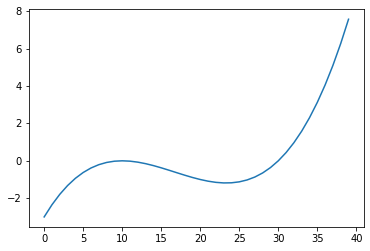

In [4]:
plt.plot(y) # jetzt muss ich NN finden, des mit Information mit x diese Graph nachbilden kann
# kompakte Raum haben wir hier von -3 bis 8

In [5]:
from tensorflow import set_random_seed
set_random_seed (245)
#Learningrate
LR=0.01
#Initialize the ANN
model_ANN= Sequential()  # macht Input Layer
#Hidden Layer erzeugen mit 3 Layer , activation function is ReLU
model_ANN.add(Dense(3,activation='relu', input_shape=(1,),use_bias=True))
#Output Layer wird nur mit ein Neuron definiert -> also am Ende kommt ein Wert y
model_ANN.add(Dense(1, activation="linear"))

#Compiling the model
model_ANN.compile(optimizer=Adam(lr=LR) , loss='mean_squared_error') # brauchen ein auch Verlust Funktion -> mittlere Quadratische Abweichung soll minimiert werden!
model_ANN.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [16]:
# insgesamt dense_1 ist Hidden Layer mit 3 Neuronen! Parameters, die ich schätzen will sind 6 (für jede Neuron wird ein Gewicht und ein Bias definiert -> 3*(1+1)=6)
# dense_2 ist Output Layer mit 1 Output Neuron! Parameters, die ich schätzen will sind 4 (für Output Neuron hat ein Bias + 3 Gewichte)

In [17]:
#Fit the model
history_ANN=model_ANN.fit(
X, # training data
y, # training targets
epochs=200,verbose=1,batch_size =2)
# Anzahl der epoche ist 200 , Gewichte würden zufällig gewählt!
# mit jeder epoche wird Verlust/Loss kleiner! -> je kleiner Verlust ist, desto mehr mein Netz trainiert, desto besser wird mein Netz am Ende sein!

Epoch 1/200
40/40 [==============================] - 1s 25ms/step - loss: 3.8286
Epoch 2/200
40/40 [==============================] - 0s 1ms/step - loss: 3.3915
Epoch 3/200
40/40 [==============================] - 0s 1ms/step - loss: 3.0896
Epoch 4/200
40/40 [==============================] - 0s 1ms/step - loss: 2.7973
Epoch 5/200
40/40 [==============================] - 0s 1ms/step - loss: 2.5877
Epoch 6/200
40/40 [==============================] - 0s 1ms/step - loss: 2.3727
Epoch 7/200
40/40 [==============================] - 0s 1ms/step - loss: 2.2214
Epoch 8/200
40/40 [==============================] - 0s 1ms/step - loss: 2.0736
Epoch 9/200
40/40 [==============================] - 0s 1ms/step - loss: 1.9459
Epoch 10/200
40/40 [==============================] - 0s 1ms/step - loss: 1.8508
Epoch 11/200
40/40 [==============================] - 0s 1ms/step - loss: 1.7247
Epoch 12/200
40/40 [==============================] - 0s 1ms/step - loss: 1.6100
Epoch 13/200
40/40 [================

In [6]:
predictions = model_ANN.predict(X)

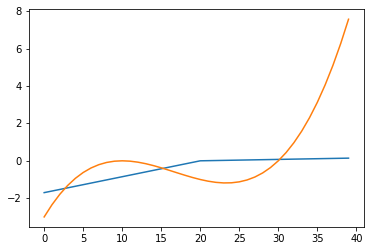

In [7]:
# Visualize
plt.plot(predictions)
plt.plot(y)
# Orange ist orignal Funktion
# Blue ist Schätzung der neuralen Netz!
# mit 3 Neuronen ist die Schätzung nicht so gut -> Idee: ich mache mehr Neuronen! -> je mehr Neuronen ich nehme, desot kleiner Scheibchen hätte ich, desto flixbler mein Struktur ist
# اذا تلاحظ كآنه فيه ٣ مقاطع بالخط الازرق تعبر عن ٣  النيورونات


In [8]:
# ich mache NN mit 20 Neuron in Hidden Layer!
from tensorflow import set_random_seed
set_random_seed (245)
#Learningrate
LR=0.01
#Initialize the ANN
model_ANN= Sequential()  # macht Input Layer
#Hidden Layer erzeugen mit 20 Layer , activation function is ReLU
model_ANN.add(Dense(20,activation='relu', input_shape=(1,),use_bias=True))
#Output Layer wird nur mit ein Neuron definiert -> also am Ende kommt ein Wert y
model_ANN.add(Dense(1, activation="linear"))

#Compiling the model
model_ANN.compile(optimizer=Adam(lr=LR) , loss='mean_squared_error') # brauchen ein auch Verlust Funktion -> mittlere Quadratische Abweichung soll minimiert werden!
model_ANN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [9]:
#Fit the model
history_ANN=model_ANN.fit(
X, # training data
y, # training targets
epochs=200,verbose=1,batch_size =2)
# Anzahl der epoche ist 200 , Gewichte würden zufällig gewählt!
# mit jeder epoche wird Verlust/Loss kleiner! -> je kleiner Verlust ist, desto mehr mein Netz trainiert, desto besser wird mein Netz am Ende sein!

Epoch 1/200
40/40 [==============================] - 2s 45ms/step - loss: 3.8264
Epoch 2/200
40/40 [==============================] - 0s 1ms/step - loss: 2.4957
Epoch 3/200
40/40 [==============================] - 0s 1ms/step - loss: 2.1295
Epoch 4/200
40/40 [==============================] - 0s 1ms/step - loss: 1.8734
Epoch 5/200
40/40 [==============================] - 0s 1ms/step - loss: 1.6359
Epoch 6/200
40/40 [==============================] - 0s 1ms/step - loss: 1.4690
Epoch 7/200
40/40 [==============================] - 0s 1ms/step - loss: 1.3874
Epoch 8/200
40/40 [==============================] - 0s 1ms/step - loss: 1.2899
Epoch 9/200
40/40 [==============================] - 0s 1ms/step - loss: 1.2714
Epoch 10/200
40/40 [==============================] - 0s 1ms/step - loss: 1.0367
Epoch 11/200
40/40 [==============================] - 0s 1ms/step - loss: 1.0329
Epoch 12/200
40/40 [==============================] - 0s 1ms/step - loss: 1.0137
Epoch 13/200
40/40 [================

In [24]:
predictions = model_ANN.predict(X)

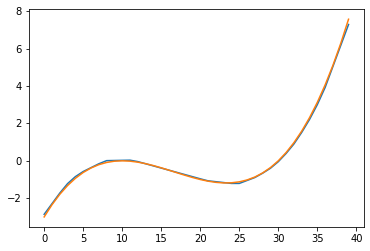

In [25]:
# Visualize
plt.plot(predictions)
plt.plot(y)
# Orange ist orignal Funktion
# Blue ist Schätzung der neuralen Netz!
# mit 20 Neuronen ist die Schätzung  so gut !
# اذا تلاحظ٢٠ نيورون يصيد عندي التقدير افضل بكثير!
# ich habe Problem Overfitting -> Grund: je flexibler Mein Modell ist, desto höher ist die Wahr. der Overfitting!

In [26]:
print(model_ANN.layers[0].get_weights()[0]) # viga (v)= Gewichte der Aktivierungsfunktion

[[ 1.0213721  -0.0167674  -0.744795   -0.99453694  0.80102986 -0.24276613
   0.9508908   0.92286503  1.2677021   0.07886358 -0.1129418  -1.0354384
   1.3647473  -0.7063081   0.02055236 -1.0857028  -0.25670153 -0.26173759
  -0.8886427  -0.88899076]]
